In [35]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
# Importing data library
import pandas as pd

In [36]:
# Pembacaan File Data Polusi Udara ISPU Excel
DKI1 = pd.read_excel("./Data/Normalization/DATA ISPU - Normalization.xlsx", sheet_name="DKI1")

In [37]:
DKI1.head(6)

,Tanggal,Wilayah,PM10,SO2,CO,O3,NO2,Max,Critical,Kategori
0,2017-01-01,DKI1 (Bunderan HI),0.719512,0.314286,0.458333,0.092308,0.012821,0.300518,PM10,Sedang
1,2017-01-02,DKI1 (Bunderan HI),0.146341,0.295238,0.270833,0.082051,0.000000,0.139896,SO2,Baik
2,2017-01-03,DKI1 (Bunderan HI),0.170732,0.295238,0.291667,0.087179,0.012821,0.139896,SO2,Baik
3,2017-01-04,DKI1 (Bunderan HI),0.243902,0.295238,0.395833,0.087179,0.012821,0.139896,SO2,Baik
4,2017-01-05,DKI1 (Bunderan HI),0.304878,0.295238,0.458333,0.056410,0.012821,0.139896,SO2,Baik
5,2017-01-06,DKI1 (Bunderan HI),0.207317,0.285714,0.437500,0.076923,0.012821,0.134715,SO2,Baik


In [42]:
X = np.array(DKI1.head(6).index).reshape(-1,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5]], dtype=int64)

In [43]:
y = np.array(DKI1['PM10'].head(6)).reshape(-1,1)
y

array([[0.7195122 ],
       [0.14634146],
       [0.17073171],
       [0.24390244],
       [0.30487805],
       [0.20731707]])

In [13]:
np.random.seed(1)

In [14]:
def f(x):
    """The function to predict."""
    return x * np.sin(x)

In [40]:
# ----------------------------------------------------------------------
#  First the noiseless case
X = np.atleast_2d([1., 3., 5., 6., 7., 8.]).T


In [41]:
X

array([[1.],
       [3.],
       [5.],
       [6.],
       [7.],
       [8.]])

In [16]:
# Observations
y = f(X).ravel()

In [49]:
# Mesh the input space for evaluations of the real function, the prediction and
# its MSE
x = np.atleast_2d(np.linspace(0, 8, 500)).T

In [50]:
# Instantiate a Gaussian Process model
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)


In [51]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=9, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [52]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

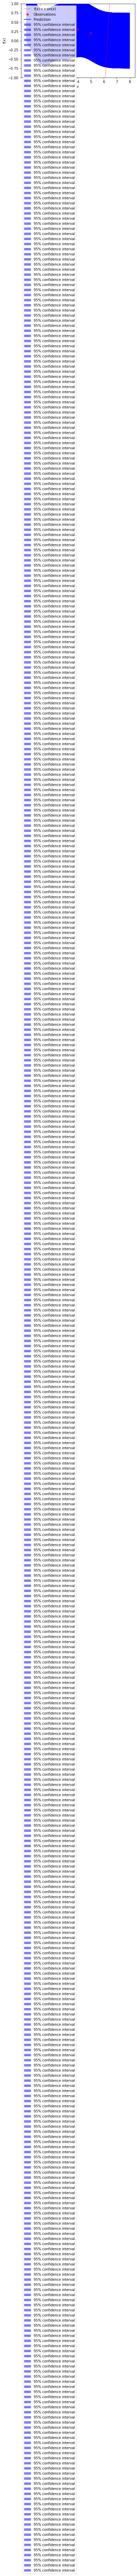

In [54]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-1, 1)
plt.legend(loc='upper left')

In [29]:
# ----------------------------------------------------------------------
# now the noisy case
X = np.linspace(0.1, 9.9, 20)
X = np.atleast_2d(X).T

In [30]:
# Observations and noise
y = f(X).ravel()
dy = 0.5 + 1.0 * np.random.random(y.shape)
noise = np.random.normal(0, dy)
y += noise

In [31]:
# Instantiate a Gaussian Process model
gp = GaussianProcessRegressor(kernel=kernel, alpha=dy ** 2,
                              n_restarts_optimizer=10)

In [32]:
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

GaussianProcessRegressor(alpha=array([0.41009543, 0.48734569, 1.69193643, 2.15579205, 0.66165889,
       1.42163322, 1.8944471 , 1.94492775, 0.34227673, 0.29058006,
       0.44867279, 1.89927676, 0.35801893, 0.84843926, 2.12544188,
       1.06743051, 1.42057105, 0.66506574, 1.40778445, 1.78122568]),
                         copy_X_train=True, kernel=1**2 * RBF(length_scale=10),
                         n_restarts_optimizer=10, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [33]:
# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

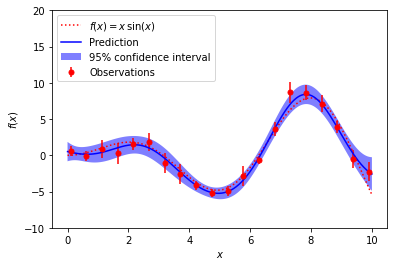

In [34]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(x, f(x), 'r:', label=r'$f(x) = x\,\sin(x)$')
plt.errorbar(X.ravel(), y, dy, fmt='r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(-10, 20)
plt.legend(loc='upper left')

plt.show()